# Import Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'numpy'

# Load data set

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')

## Data insepct and cleaning


In [ ]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe(include = 'all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [ ]:
df.shape

(200, 5)

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop('CustomerID', axis = 1, inplace = True)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [ ]:
numerical = ['Age','Annual Income (k$)','Spending Score (1-100)']
categorical = ['Gender']

## Visualization

<Axes: >

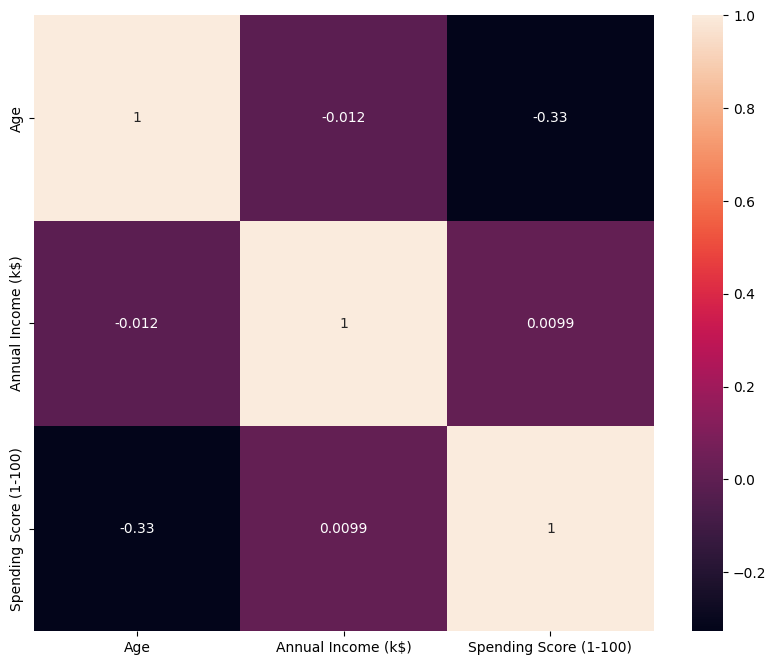

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(df[numerical].corr(), annot = True)

<Axes: xlabel='Gender', ylabel='count'>

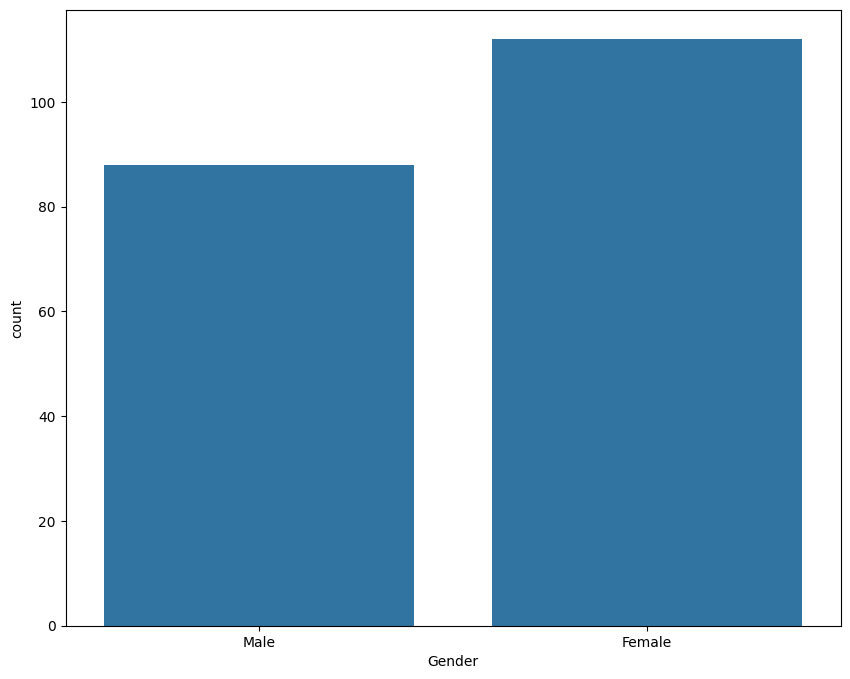

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'Gender', data = df)

<Axes: xlabel='Age', ylabel='Count'>

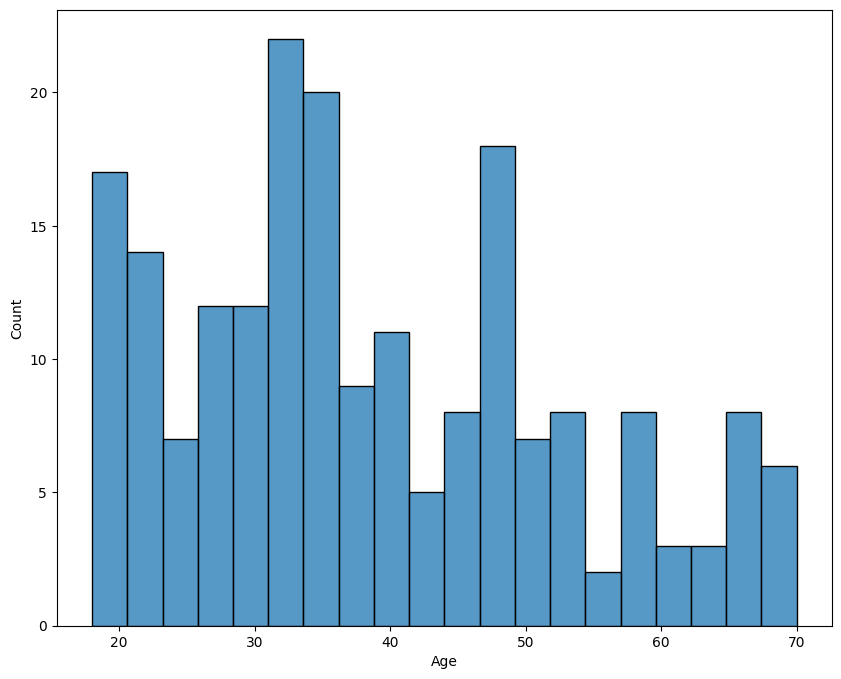

In [ ]:
plt.figure(figsize = (10,8))
sns.histplot(x = 'Age', data = df , bins = 20)

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

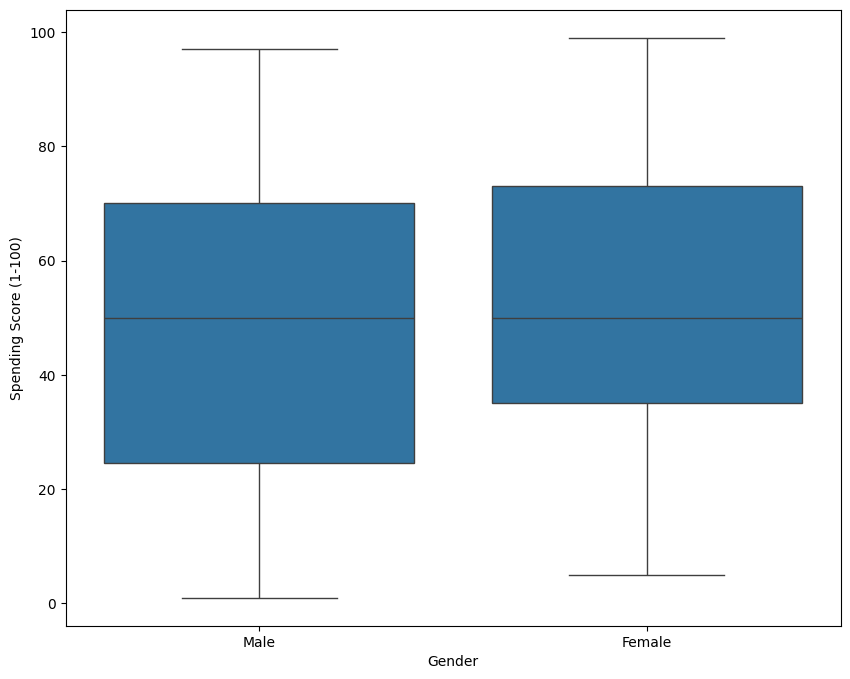

In [ ]:
plt.figure(figsize = (10,8))
sns.boxplot(x ='Gender',y='Spending Score (1-100)' ,data = df)

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

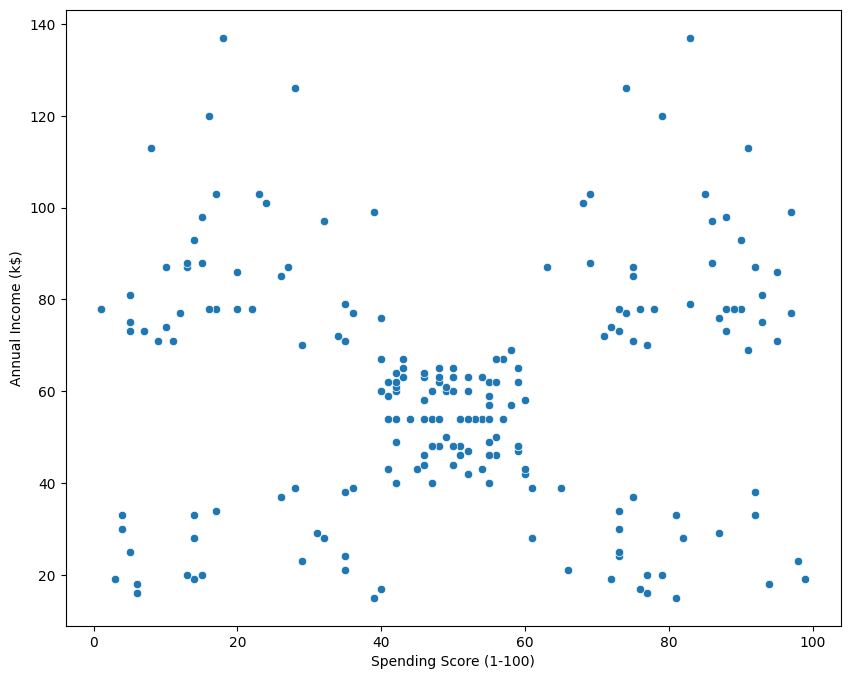

In [ ]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'Spending Score (1-100)', y = 'Annual Income (k$)', data = df)

## Encoding

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [ ]:
LabelEncoder = LabelEncoder()
df['Gender'] = LabelEncoder.fit_transform(df['Gender'])

In [ ]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [ ]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


# K means

In [ ]:
from sklearn import metrics
from sklearn.cluster import KMeans

In [ ]:
X = df.values

## Elbow method

In [ ]:
inertia = []
for k in range(1,11):
  kmeans = KMeans(n_clusters = k, random_state = 42)
  kmeans.fit(df)
  inertia.append(kmeans.inertia_)

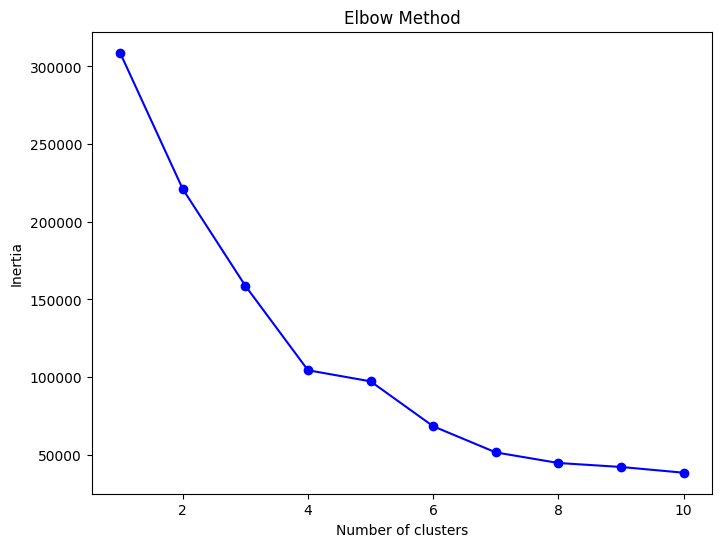

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(range(1,11),inertia,'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 5, random_state = 42,n_init=10)
kmeans.fit(X)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [ ]:
centroids = pd.DataFrame(kmeans.cluster_centers_,columns = ['Age','Gender','Annual Income (k$)','Spending Score (1-100)'])
print(centroids)

        Age     Gender  Annual Income (k$)  Spending Score (1-100)
0  0.391304  45.217391           26.304348               20.913043
1  0.417722  43.088608           55.291139               49.569620
2  0.461538  32.692308           86.538462               82.128205
3  0.527778  40.666667           87.750000               17.583333
4  0.391304  25.521739           26.304348               78.565217


In [ ]:
clusters_names ={
    0:'normal income , normal spending',
    1:'high income , high spending',
    2:'low income , high spending',
    3:'high income , low spending',
    4:'low income , low spending',
}

In [ ]:
print(f"CLusters center {kmeans.cluster_centers_}")
print(f"Labels {kmeans.labels_}")

CLusters center [[ 0.39130435 45.2173913  26.30434783 20.91304348]
 [ 0.41772152 43.08860759 55.29113924 49.56962025]
 [ 0.46153846 32.69230769 86.53846154 82.12820513]
 [ 0.52777778 40.66666667 87.75       17.58333333]
 [ 0.39130435 25.52173913 26.30434783 78.56521739]]
Labels [0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 1 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


## Predict

In [ ]:
new_data = [[25,1,5000,80]]
cluster_label = kmeans.predict(new_data)[0]
print(f"Cluster label for new data {cluster_label}")
print(f"Cluster name {clusters_names[cluster_label]}")

Cluster label for new data 3
Cluster name high income , low spending


/tmp/ipython-input-2601911926.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


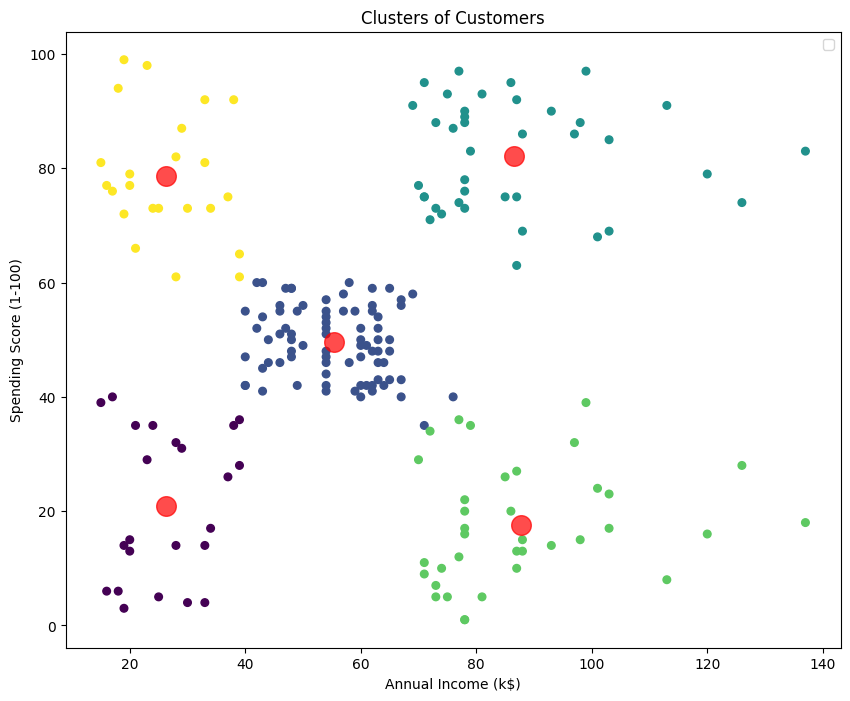

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(df.iloc[:,2],df.iloc[:,3],c = kmeans.labels_,cmap='viridis',s=30)
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],c='red',s=200,alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of Customers')
plt.legend()
plt.show()

In [ ]:
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']